<a href="https://colab.research.google.com/github/sureeratsalangsing/kku_data_mining/blob/master/Kmean_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Generate Data

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X,y = make_blobs(n_samples=300, centers=3, n_features=2,random_state=6)

In [4]:
X.shape

(300, 2)

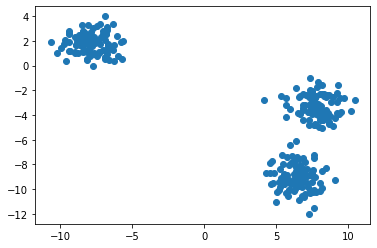

In [5]:
from matplotlib import pyplot as plt 
plt.scatter(X[:,0],X[:,1])

#import

In [6]:
from sklearn.cluster import  KMeans

#Define

In [16]:
KMclust = KMeans(n_clusters=5)

#Train

In [17]:
KMclust.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#Predict

In [18]:
label = KMclust.predict(X)

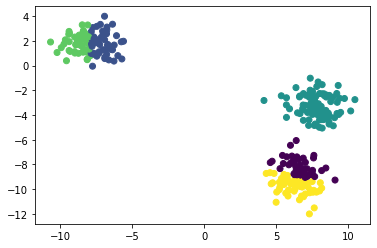

In [19]:
plt.scatter(X[:, 0],X[:, 1], c=label)

##Color quantization (application of Kmean)

In [35]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import cv2
import os

In [37]:
img = cv2.imread(os.path.join(path,'727b91ebd032212f033672a941b82f0c.jpg'))

In [38]:
img

array([[[  1,  15,  11],
        [  0,   9,   5],
        [  0,   4,   3],
        ...,
        [  0,  31,  40],
        [ 33,  72,  81],
        [ 62, 108, 116]],

       [[  0,  11,   8],
        [  0,  11,   8],
        [  2,  10,   9],
        ...,
        [ 27,  54,  64],
        [ 53,  89,  99],
        [ 66, 107, 116]],

       [[  0,   4,   3],
        [  4,  12,  11],
        [  9,  15,  14],
        ...,
        [ 49,  72,  80],
        [ 58,  89,  98],
        [ 44,  80,  88]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  9,   5,   4],
        [ 10,   6,   5],
        [  9,   5,   4]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 11,   7,   6],
        [ 12,   8,   7],
        [ 11,   7,   6]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 13,   9,   8],
        [ 14,  10,   9],
        [ 13,   9,   8]]

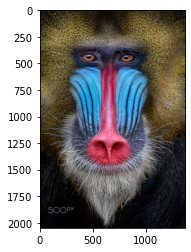

In [39]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

In [40]:
RGB_img.shape

(2048, 1366, 3)

#count unique colors

In [42]:
import numpy as np

In [43]:
np.unique(RGB_img).shape

(256,)

##Use K-mean to reduce color from 256 colors to 8 colors

In [49]:
#Define
myQuantize = KMeans(n_clusters=8)

In [50]:
img_row = np.reshape(RGB_img,(2048*1366,3))
img_row

array([[11, 15,  1],
       [ 5,  9,  0],
       [ 3,  4,  0],
       ...,
       [ 8,  9, 13],
       [ 9, 10, 14],
       [ 8,  9, 13]], dtype=uint8)

In [51]:
#train
myQuantize.fit(img_row)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [52]:
#Predict
res = myQuantize.predict(img_row)

In [53]:
res

array([3, 3, 3, ..., 3, 3, 3], dtype=int32)

#Get Cluater centers

In [54]:
clus_cen = myQuantize.cluster_centers_
clus_cen

array([[ 53.38352982,  45.30295151,  31.84987516],
       [192.43545619, 166.81040582, 168.50479339],
       [181.43290833,  62.27827334,  91.00368909],
       [ 11.67208794,  11.24722252,  10.18082719],
       [104.21921695,  86.22887557,  52.16511108],
       [ 74.56607267,  83.26613812,  99.45536479],
       [ 68.35605456, 160.58050518, 213.39078555],
       [136.93744016, 127.91826315, 110.8487513 ]])

In [55]:
clus_cen.shape

(8, 3)

#Map color name back to imge

In [56]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
  for j in range(RGB_img.shape[1]):
    new_img[i,j,:] = clus_cen[myQuantize.predict([RGB_img[i,j,:]]),:]

In [57]:
new_img_ = new_img/255

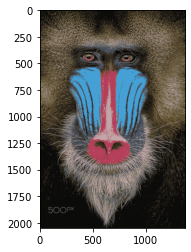

In [58]:
plt.imshow(new_img_)